# Table of Contents

1. [Introduction](#1-Introduction) <br>
2. [Dataset Description](#2-Dataset-Description) <br>
3. [K-Nearest Neighbors (KNN)](#3-K-Nearest-Neighbors-(KNN)) <br>
    3.1 [Mathematical Foundations of KNN](#3-1-Mathematical-Foundations-of-KNN) <br>
    3.1.1 [Manhattan Distance (also L1 Distance)](#3-1-1-Manhattan-Distance-(also-L1-Distance)) <br>
    3.1.2 [Minkowski Distance](#3-1-2-Minkowski-Distance) <br>
    3.2 [KNN Implementation](#3-2-KNN-Implementation) <br>
4. [K-Medoids](#4-K-Medoids) <br>
    4.1 [Mathematical Foundations of K-Medoids](#4-1-Mathematical-Foundations-of-K-Medoids) <br>
    4.2 [K-Medoids Implementation](#4-2-K-Medoids-Implementation) <br>
5. [Gaussian Mixture Models (GMM)](#5-Gaussian-Mixture-Models-(GMM)) <br>
    5.1 [Mathematical Foundations of GMM](#5-Gaussian-Mixture-Models-(GMM)) <br>
    5.2 [GMM Implementation](#5-2-GMM-Implementation) <br>
6. [Visualization and Interpretation of Results](#6-Visualization-and-Interpretation-of-Results) <br>
7. [Conclusion](#7-Conclusion) <br>

<a id="1-Introduction"></a>
# 1. Introduction

In this project, we will examine three different clustering algorithms: K-Nearest Neighbors (KNN), K-Medoids, and Gaussian Mixture Models (GMM). These methods are among the most popular techniques in the field of Unsupervised Learning. The goal is to identify a group of similar data points and divide them into clusters.

<a id="2-Dataset-Description"></a>
# 2. Dataset Description

For this project, we use the Iris dataset, which classifies three different types of Iris flowers based on four attributes (Sepal length, Sepal width, Petal length, Petal width). Since labels are not needed in our case, we will remove them and focus on clustering the data.

In [1]:
# To prevent memory leaks when working with KMeans on Windows
import os
os.environ["OMP_NUM_THREADS"] = '1'

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [2]:
# Load dataset
iris = load_iris()
X = iris.data

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<a id="3-K-Nearest-Neighbors-(KNN)"></a>
# 3. K-Nearest Neighbors (KNN)
<a id="3-1-Mathematical-Foundations-of-KNN"></a>
## 3.1 Mathematical Foundations of KNN

KNN is a simple but effective classification algorithm that can also be used for clustering. The algorithm calculates the distance between points and selects the k nearest neighbors. The commonly used distance is Euclidean distance, defined as follows:

$$
d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$$

where $x_i$ and $y_i$ are the coordinates of data points in n-dimensional space.

*Below we will also explore two additional methods to calculate the distance between points.*

<a id="3-1-1-Manhattan-Distance-(also-L1-Distance)"></a>
### 3.1.1 Manhattan Distance (also L1 Distance)

The Manhattan Distance, also known as City-Block Distance, measures the distance between two points by summing the absolute differences of their coordinates:

$$
d(x, y) = \sum_{i=1}^n |x_i - y_i|
$$

where $x_i$ and $y_i$ are the coordinates of the points in n-dimensional space.

<a id="3-1-2-Minkowski-Distance"></a>
### 3.1.2 Minkowski Distance

The Minkowski Distance generalizes both the Euclidean and Manhattan distances. It is controlled by a parameter $p$, which determines whether the calculation resembles the Euclidean or Manhattan distance:

$$
d(x, y) = \left( \sum_{i=1}^n |x_i - y_i|^p \right)^{\frac{1}{p}}
$$

    For p=1, the Minkowski Distance is equivalent to the Manhattan Distance.
    For p=2, it corresponds to the Euclidean Distance.

<a id="3-2-KNN-Implementation"></a>
## 3.2 KNN Implementation

We will apply KNN with a given value for k and make predictions based on the k neighbors.

In [3]:
# Apply KNN model to the dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, iris.target)

# Prediction for the first 10 data points
print("KNN Predictions:", knn.predict(X_scaled[:10]))

KNN Predictions: [0 0 0 0 0 0 0 0 0 0]


<a id="4-K-Medoids"></a>
# 4. K-Medoids
<a id="4-1-Mathematical-Foundations-of-K-Medoids"></a>
## 4.1 Mathematical Foundations of K-Medoids

Unlike K-Means, which uses the mean to determine the center, K-Medoids uses actual points from the data as medoids (centroids). The goal is to minimize the sum of distances of all points to their nearest medoid:

$$
J = \sum_{i=1}^n \min_{k=1,\dots,K} d(x_i, m_k)
$$

where $d(x_i, m_k)$ is the distance of a point $x_i$ to its medoid $m_k$.

<a id="4-2-K-Medoids-Implementation"></a>
## 4.2 K-Medoids Implementation

In [4]:
# Create and fit K-Medoids model
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(X_scaled)

# Output cluster labels
print("K-Medoids Cluster Labels:", kmedoids.labels_)

K-Medoids Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


<a id="5-Gaussian-Mixture-Models-(GMM)"></a>
# 5. Gaussian Mixture Models (GMM)
<a id="5-Gaussian-Mixture-Models-(GMM)"></a>
## 5.1 Mathematical Foundations of GMM

GMM is based on the assumption that the data can be modeled by a mixture of several multivariate normal distributions (Gaussian distributions). Each distribution has its own covariance matrix, and the overall distribution is described by the sum of the individual distributions. The probability of a point $x$ under a GMM is:

$$
p(x) = \sum_{k=1}^K \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)
$$

where $N(x | \mu_k, \Sigma_k)$ is a multivariate normal distribution with mean $μ_k$ and covariance matrix $Σ_k$, and $π_k$ is the weight of the k-th cluster.

<a id="5-2-GMM-Implementation"></a>
## 5.2 GMM Implementation

In [5]:
# Create and fit GMM model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)

# Output cluster labels
print("GMM Cluster Labels:", gmm.predict(X_scaled))

GMM Cluster Labels: [1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 2 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


<a id="6-Visualization-and-Interpretation-of-Results"></a>
# 6. Visualization and Interpretation of Results

Now we visualize the cluster assignments for all three algorithms and compare the results.

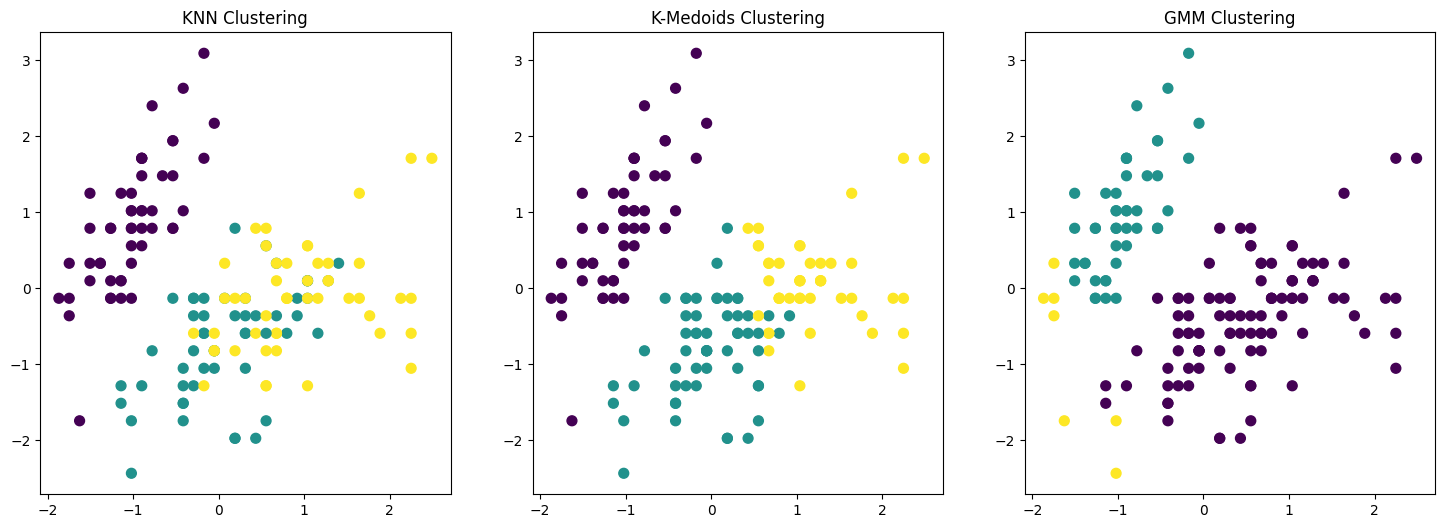

In [6]:
# Get cluster labels from GMM and K-Medoids
labels_knn = knn.predict(X_scaled)
labels_kmedoids = kmedoids.labels_
labels_gmm = gmm.predict(X_scaled)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# KNN
ax[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_knn, cmap='viridis', s=50)
ax[0].set_title("KNN Clustering")

# K-Medoids
ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmedoids, cmap='viridis', s=50)
ax[1].set_title("K-Medoids Clustering")

# GMM
ax[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_gmm, cmap='viridis', s=50)
ax[2].set_title("GMM Clustering")
plt.show()

<a id="7-Conclusion"></a>
# 7. Conclusion

We successfully performed clustering with three different algorithms: KNN, K-Medoids, and GMM. Each algorithm uses different approaches to group data points. While KNN is a classification-based approach, K-Medoids and GMM work explicitly with unsupervised learning. The choice of the best algorithm often depends on the structure and properties of the data.